<a href="https://colab.research.google.com/github/Asaduzzamanhipu/Machine-Learning/blob/main/16_small_image_classification_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, datasets, layers
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

# So we taht y_test and train data is in 2D. For image classification 1D is good. So we will convert it into 1D

In [ ]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
y_train[:4]

array([6, 9, 9, 4], dtype=uint8)

In [ ]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','frog','truck']

## Lets plot some samples for visualizations

In [ ]:
def plot_sample(x, y, index):
    plt.figure(figsize=(1,1))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

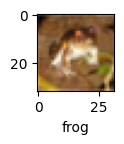

In [ ]:
plot_sample(x_train,y_train,0)

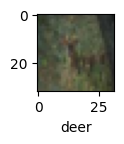

In [ ]:
plot_sample(x_train, y_train,10)

# Now we have to nomalize images:
We have to normalize it by contracting the values between 0---1.The real image has 3 channels(RGB)

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

# Now lets build a model with traditional ANN

In [ ]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(100, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(10, activation='sigmoid')#ouput layers
])

ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann.fit(x_train,y_train,epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.2672 - loss: 2.0207
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.3746 - loss: 1.7432
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4007 - loss: 1.6621
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.4242 - loss: 1.6119
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.4360 - loss: 1.5791
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.4458 - loss: 1.5546
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.4484 - loss: 1.5332
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4538 - loss: 1.5226
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.4666 - loss: 1.4906
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4674 - loss: 1.4855


So we see that after 10 epochs the accuracy is below 49%

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

In [ ]:
y_predict=ann.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
y_predict_classes=[np.argmax(element) for element in y_predict]

In [ ]:
print('Classification report is: \n', classification_report(y_test, y_predict_classes))

Classification report is: 
               precision    recall  f1-score   support

           0       0.63      0.41      0.50      1000
           1       0.59      0.59      0.59      1000
           2       0.39      0.20      0.27      1000
           3       0.33      0.39      0.36      1000
           4       0.37      0.42      0.39      1000
           5       0.47      0.23      0.30      1000
           6       0.35      0.71      0.47      1000
           7       0.54      0.47      0.50      1000
           8       0.47      0.72      0.57      1000
           9       0.59      0.36      0.45      1000

    accuracy                           0.45     10000
   macro avg       0.47      0.45      0.44     10000
weighted avg       0.47      0.45      0.44     10000



Now Lets build a CNN model

In [ ]:
cnn=models.Sequential([
    #convulation llayer 1:
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    #Convulation layr 2:
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    #Tradional ann layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn.fit(x_train, y_train, epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7751 - loss: 0.6501
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.7819 - loss: 0.6203
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.7949 - loss: 0.5955
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 44ms/step - accuracy: 0.7973 - loss: 0.5755
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.8064 - loss: 0.5521
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.8113 - loss: 0.5356
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.8205 - loss: 0.5098
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.8254 - loss: 0.4979
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.8353 - loss: 0.4780
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.8437 - loss: 0.4492
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.8456 - loss: 0.4413
Epoch 12

It is observed that with cnn the accuracy score is almost 90%.

In [ ]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.6921 - loss: 1.3216


[1.3415652513504028, 0.692799985408783]

In [ ]:
y_pred=cnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


In [ ]:
y_pred[:5]

array([[5.93265614e-09, 4.90267440e-13, 1.16823008e-04, 9.65820193e-01,
        1.56055801e-04, 3.21917161e-02, 1.71497522e-03, 1.27863700e-07,
        8.90614658e-08, 2.55365951e-08],
       [1.27562503e-08, 9.98476923e-01, 3.33029475e-13, 2.84349164e-14,
        1.26806702e-14, 5.26666399e-16, 6.89297049e-14, 1.04998892e-16,
        1.49918511e-03, 2.38522462e-05],
       [6.08432218e-02, 2.00033292e-01, 1.62899159e-05, 1.30916567e-04,
        1.73006358e-03, 1.00773919e-04, 1.73462045e-08, 1.80805055e-05,
        7.25595474e-01, 1.15318373e-02],
       [7.52836525e-01, 7.72661045e-02, 1.51946679e-01, 5.11788176e-06,
        2.53748112e-06, 1.40734158e-09, 2.60831912e-05, 2.46792592e-06,
        1.78641248e-02, 5.04457712e-05],
       [6.21589002e-10, 3.87415896e-14, 1.83651684e-06, 7.53122367e-05,
        9.99883592e-01, 3.93648463e-07, 3.88597327e-05, 7.60899243e-12,
        1.21287225e-11, 3.93732254e-14]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]

In [ ]:
y_classes[:5]

[np.int64(3), np.int64(1), np.int64(8), np.int64(0), np.int64(4)]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

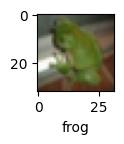

In [ ]:
plot_sample(x_test, y_test, 7)

In [ ]:
classes[y_classes[7]]

'frog'

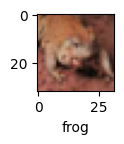

In [ ]:
plot_sample(x_test,y_test,5)

In [ ]:
classes[y_classes[5]]

'frog'

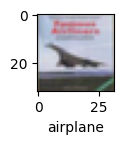

In [ ]:
plot_sample(x_test,y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'